# Ford Gobike Data Exploration
## by Shahad Al-Khalifa

## Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. The Ford GoBike system, which began operations as Bay Area Bike Share in August 2013, now includes approximately 2,600 bicycles in 262 stations around San Francisco, the East Bay, and San Jose. In a collaboration with Ford Motor Company, the system was formally introduced as Ford GoBike on June 28, 2017.

Ford GoBike, like other bike sharing systems, is made up of a fleet of carefully constructed, strong, and durable bikes that are docked at a network of docking stations located around the city. The bikes may be unlocked at any station in the system and returned to any other station, making them perfect for one-way excursions. The bikes are accessible for use 24 hours a day, seven days a week, 365 days a year, and riders who become members or purchase passes have access to all bikes in the network.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read file and view the first five rows
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Look at a sample of data
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
148583,740,2019-02-06 21:17:50.0850,2019-02-06 21:30:10.1370,245.0,Downtown Berkeley BART,37.870139,-122.268422,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,342,Subscriber,1992.0,Female,No
29942,231,2019-02-25 01:42:22.5220,2019-02-25 01:46:13.6160,310.0,San Fernando St at 4th St,37.335885,-121.885660,357.0,2nd St at Julian St,37.341132,-121.892844,6167,Subscriber,1992.0,Male,Yes
125358,899,2019-02-11 07:27:02.1700,2019-02-11 07:42:02.0240,53.0,Grove St at Divisadero,37.775946,-122.437777,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,5070,Subscriber,1987.0,Female,No
126131,186,2019-02-10 20:54:39.7840,2019-02-10 20:57:46.1790,75.0,Market St at Franklin St,37.773793,-122.421239,77.0,11th St at Natoma St,37.773507,-122.416040,4752,Subscriber,NaN,NaN,No
62832,405,2019-02-20 16:23:37.5250,2019-02-20 16:30:23.1430,24.0,Spear St at Folsom St,37.789677,-122.390428,25.0,Howard St at 2nd St,37.787522,-122.397405,6095,Subscriber,1993.0,Female,No
99182,216,2019-02-14 20:57:58.7090,2019-02-14 21:01:35.5350,285.0,Webster St at O'Farrell St,37.783521,-122.431158,54.0,Alamo Square (Steiner St at Fulton St),37.777547,-122.433274,5916,Subscriber,1991.0,Male,No
69609,627,2019-02-19 19:10:48.0320,2019-02-19 19:21:15.0780,50.0,2nd St at Townsend St,37.780526,-122.390288,61.0,Howard St at 8th St,37.776513,-122.411306,4335,Subscriber,1992.0,Male,No
60891,354,2019-02-20 18:11:29.2160,2019-02-20 18:17:23.4220,47.0,4th St at Harrison St,37.780955,-122.399749,81.0,Berry St at 4th St,37.775880,-122.393170,5937,Subscriber,1992.0,Female,No
103136,326,2019-02-14 14:33:00.2110,2019-02-14 14:38:26.2210,50.0,2nd St at Townsend St,37.780526,-122.390288,64.0,5th St at Brannan St,37.776754,-122.399018,6545,Subscriber,1950.0,Male,No
16768,394,2019-02-27 08:09:13.5290,2019-02-27 08:15:47.9130,73.0,Pierce St at Haight St,37.771793,-122.433708,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,4834,Customer,1973.0,Male,No


In [4]:
# Look at the information of the data such as columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Change the data type for start and end time to be datetime64[ns] 
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [7]:
# Create a new column containing the date, time, and day of the week of both start and end times

# Date
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['end_date'] = pd.to_datetime(df['end_time']).dt.date

# Day of the week
df['start_day'] = pd.to_datetime(df['start_time']).dt.day_name()
df['end_day'] = pd.to_datetime(df['end_time']).dt.day_name()

# Time
df['start_time'] = pd.to_datetime(df['start_time']).dt.time
df['end_time'] = pd.to_datetime(df['end_time']).dt.time

df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_day,end_day
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday
1,42521,18:53:21.789000,06:42:03.056000,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,2019-03-01,Thursday,Friday
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,Thursday,Friday
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,Thursday,Friday
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday
6,1147,23:55:35.104000,00:14:42.588000,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,2019-02-28,2019-03-01,Thursday,Friday
7,1615,23:41:06.766000,00:08:02.756000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday
8,1570,23:41:48.790000,00:07:59.715000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,2019-02-28,2019-03-01,Thursday,Friday
9,1049,23:49:47.699000,00:07:17.025000,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,2019-02-28,2019-03-01,Thursday,Friday


In [8]:
# The sum of null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_date                    0
end_date                      0
start_day                     0
end_day                       0
dtype: int64

In [9]:
# Remove rows that does not have gender value
df = df[df['member_gender'].isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null object
end_time                   175147 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
start_date                 175147 non-null object
end_date                   175147 

In [10]:
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
start_date                   0
end_date                     0
start_day                    0
end_day                      0
dtype: int64

In [11]:
# Remove rows that does not have start_station_id
df = df[df['start_station_id'].isnull() == False]
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
end_date                   0
start_day                  0
end_day                    0
dtype: int64

In [12]:
# Change the data type of start and end station id to integer
df = df.astype({"start_station_id":"int","end_station_id":"int"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null object
end_date                   174952 non-

In [13]:
# Check for duplicated values
df.duplicated().sum()

0

In [14]:
# Change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null bool
start_date                 174952 non-null object
end_date                   174952 non-nu

In [16]:
df.shape

(174952, 20)

In [17]:
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [18]:
# Create column age to investigate it further by subtracting 2019, where the data was first published, from the birth year
df['age'] = 2019 - df['member_birth_year']

In [19]:
df['age'].sample(10)

88042     44.0
134816    55.0
124885    36.0
125478    28.0
134975    40.0
83790     33.0
151243    36.0
19174     34.0
52205     37.0
82249     25.0
Name: age, dtype: float64

In [20]:
df['age'] = df['age'].astype('int64')
df['age'].sample(5)

78548     33
154594    40
14956     33
182903    44
33224     30
Name: age, dtype: int64

In [21]:
print(df['age'].min(), df['age'].max())

18 141


The maximum age value shows that some of the registered birth year are incorrect, thus we will drop the rows with the age value > 100.

In [22]:
df[df['age'] > 100].count()

duration_sec               72
start_time                 72
end_time                   72
start_station_id           72
start_station_name         72
start_station_latitude     72
start_station_longitude    72
end_station_id             72
end_station_name           72
end_station_latitude       72
end_station_longitude      72
bike_id                    72
user_type                  72
member_birth_year          72
member_gender              72
bike_share_for_all_trip    72
start_date                 72
end_date                   72
start_day                  72
end_day                    72
age                        72
dtype: int64

In [23]:
df = df[df['age'] < 100]
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_day,end_day,age
0,52185,17:32:10.145000,08:01:55.975000,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,False,2019-02-28,2019-03-01,Thursday,Friday,35
2,61854,12:13:13.218000,05:24:08.146000,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,False,2019-02-28,2019-03-01,Thursday,Friday,47
3,36490,17:54:26.010000,04:02:36.842000,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,False,2019-02-28,2019-03-01,Thursday,Friday,30
4,1585,23:54:18.549000,00:20:44.074000,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,True,2019-02-28,2019-03-01,Thursday,Friday,45
5,1793,23:49:58.632000,00:19:51.760000,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,False,2019-02-28,2019-03-01,Thursday,Friday,60


In [24]:
df[df['age'] > 100].count()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
end_date                   0
start_day                  0
end_day                    0
age                        0
dtype: int64

In [25]:
df.shape

(174880, 21)

### What is the structure of your dataset?

> The dataset has 183412 bike rides that happened in the San Francisco Bay Area. The dataset has 16 features, some of them are:
- `duration_sec`: The duration of the trip in seconds.
- `start_time` and `end_time` for the bike rides.
- `start_station_name` and `end_station_name`, as well as latitude and longitude.
- `user_type` of either a subscriber or a customer.
- Some information of the members such as their gender and birth year.

> After my modifications the dataset has 174880 bike rides and 21 features. The added features are the `age`, `start_date`, `end_date`, `start_day`, and `end_day`, since I want to investigate them further.

### What is/are the main feature(s) of interest in your dataset?

> Some of the features of interest in this dataset are the duration of trips and its relation to other features like the user type, age, gender, and day of the week. Also, the most popular start and end stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that trip duration will have the strongest effect on each the start stations and end stations due to the crowded places which is expected to receive more rides. Another feature is the user type since I expect subscribers to spend more time on bikes than customers.

## Univariate Exploration

> This section provides a descriptive summary of the distribution of some variables. It also includes visual representations, such as histograms and bar plots, to help understand the shape and spread of the data. The goal of this section is to identify patterns, anomalies, and potential issues in the data that could impact the results of further analysis.

### What is the distribution of `duration_sec`?

In [26]:
max_duration = df['duration_sec'].max()
max_duration

84548

In [27]:
min_duration = df['duration_sec'].min()
min_duration

61

In [28]:
avg_duration = df['duration_sec'].mean()
avg_duration

704.02235818847214

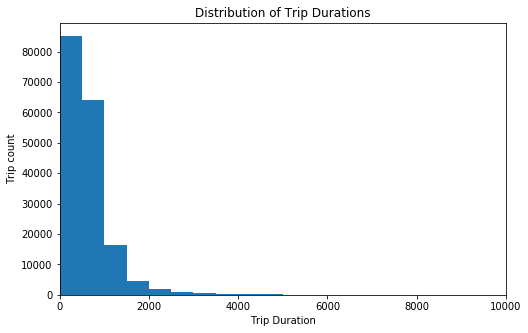

In [29]:
# Plot the histogram
plt.figure(figsize = [8, 5])
bin_size = 500
plt.hist(data = df, x = 'duration_sec', bins = np.arange(0, max_duration + bin_size, bin_size))
plt.xlim([0, 10000])

# Add labels and formatting
plt.xlabel('Trip Duration')
plt.ylabel('Trip count')
plt.title('Distribution of Trip Durations')

plt.show()

> There is a long tail in the distribution so we will put it in a logarthimic scale to make the distribution less skewed.

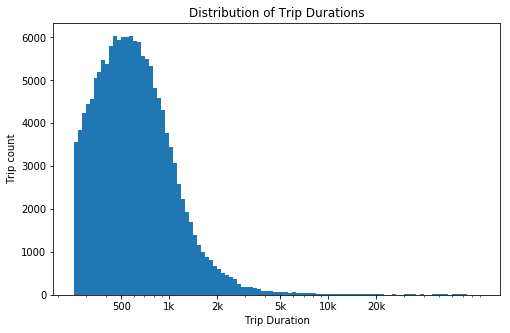

In [30]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(max_duration) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])

# Add labels and formatting
plt.xlabel('Trip Duration')
plt.ylabel('Trip count')
plt.title('Distribution of Trip Durations')
plt.show()

Most of the trip duration is focused in the lower spectrum. The majority of the numbers are less than 2k seconds, with the peak being about 600 seconds. When plotted on a log-scale, the distribution of trip durations looks right-skewed unimodal distribution. Overall, we conclude that trip durations are short on average.

### What is the distribution of `user_type`?

In [31]:
# Create a function to display the bar plots and prevent repetitive code

def create_bar_plot(df, x, order = None, color = None):
    plt.figure(figsize = [8, 5])
    plot = sb.countplot(data = df, x = x, order = order, color = color)
    plt.xlabel(f'{x}')

In [32]:
df['user_type'].value_counts()

Subscriber    158319
Customer       16561
Name: user_type, dtype: int64

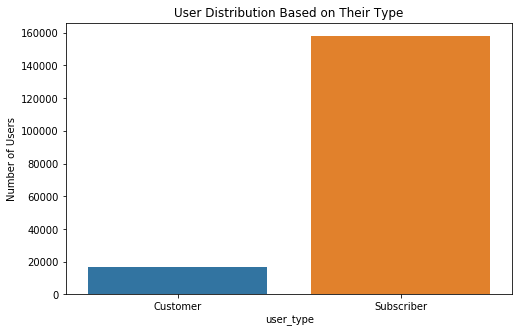

In [33]:
create_bar_plot(df, x = 'user_type')
plt.ylabel('Number of Users')
plt.title("User Distribution Based on Their Type")

plt.show()

Most of the users are subscribers with a total of 158386, whereas the customers are way less with a total of 16566. This shows that the majority users of Ford Gobike system are subscribers.

### What is the distribution of user's `age`?

In [34]:
df['age'].min()

18

In [35]:
df['age'].max()

99

In [36]:
df['age'].mean()

34.162042543458369

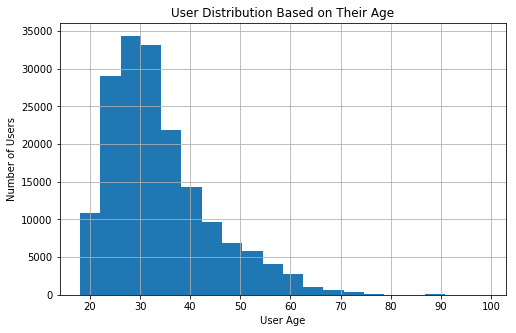

In [37]:
plt.figure(figsize = [8, 5])
plot = df['age'].hist(bins = 20)
plt.xlabel('User Age')
plt.ylabel('Number of Users')
plt.title("User Distribution Based on Their Age")

plt.show()

Most users are aged between 22 and 40 with the average being 34. This shows that most users are young.

### What is the distribution of user's `gender`?

In [38]:
df['member_gender'].value_counts()

Male      130443
Female     40791
Other       3646
Name: member_gender, dtype: int64

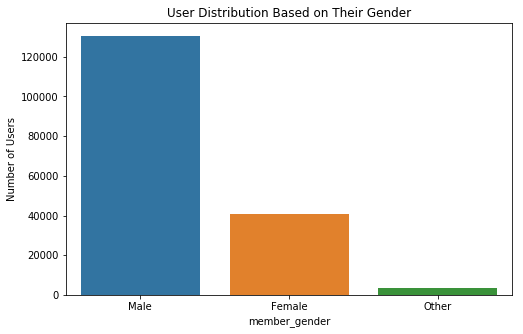

In [39]:
# Use function `create_bar_plot` defined earlier

create_bar_plot(df, x = 'member_gender', order = ['Male', 'Female', 'Other'])
plt.ylabel('Number of Users')
plt.title("User Distribution Based on Their Gender")

plt.show()

From the plot, we can see that the majority of users are male with a total of 130443 male users. Female users come next with a total of 40791 female users.

### What are the top five start stations among users?

In [40]:
df['start_station_name'].nunique()

329

In [41]:
df['start_station_name'].unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at Dolores St', 'Grove St at Masonic Ave',
       'Frank H Ogawa Plaza', '4th St at Mission Bay Blvd S',
       'Palm St at Willow St', 'Washington St at Kearny St',
       'Post St at Kearny St', 'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Bancroft Way at College Ave',
       'Howard St at Mary St', '22nd St at Dolores St',
       'Laguna St at Hayes St', '5th St at Folsom',
       'Telegraph Ave at 23rd St', 'Page St at Scott St',
       'Lake Merritt BART Station', 'West St at 40th St',
       'The Embarcadero at Sansome St', 'Folsom St at 9th St',
       'University Ave at Oxford St', 'MLK Jr Way at University Ave',
       'The Embarcadero at Bryant St', '17th St at Valencia St',
       'Valencia St at 16th St', 'Valencia St at 22nd St',
       'Franklin Square', 'San Pablo Ave at MLK Jr Way',
       '19th St at Mission 

In [42]:
df['start_station_name'].value_counts()

Market St at 10th St                                               3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3406
Berry St at 4th St                                                 2951
Montgomery St BART Station (Market St at 2nd St)                   2711
Powell St BART Station (Market St at 4th St)                       2620
San Francisco Caltrain (Townsend St at 4th St)                     2572
San Francisco Ferry Building (Harry Bridges Plaza)                 2540
Howard St at Beale St                                              2216
Steuart St at Market St                                            2191
Powell St BART Station (Market St at 5th St)                       2144
The Embarcadero at Sansome St                                      1975
Bancroft Way at Telegraph Ave                                      1761
Bancroft Way at College Ave                                        1712
2nd St at Townsend St                                           

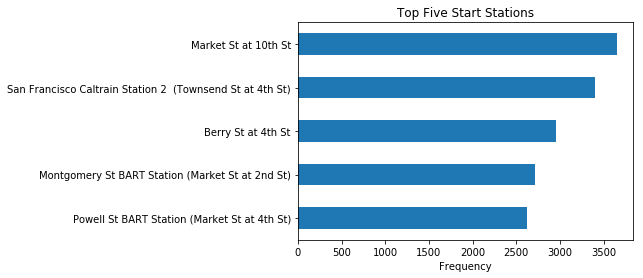

In [43]:
plt.title('Top Five Start Stations')
plt.xlabel('Frequency')
df['start_station_name'].value_counts(ascending=True).tail(5).plot.barh(color = '#1f77b4');

We can see that the top five start stations among users, respectively, are:
- Market St at 10th St
- San Francisco Caltrain Station 2  (Townsend St at 4th St)
- Berry St at 4th St
- Montgomery St BART Station (Market St at 2nd St)
- Powell St BART Station (Market St at 4th St)

### What are the top five end stations among users?

In [44]:
df['end_station_name'].nunique()

329

In [45]:
df['end_station_name'].unique()

array(['Commercial St at Montgomery St',
       'Powell St BART Station (Market St at 4th St)',
       'Central Ave at Fell St', '10th Ave at E 15th St',
       'Broadway at Kearny', 'San Jose Diridon Station',
       'Valencia St at 21st St', 'Mission Playground',
       'San Francisco Public Library (Grove St at Hyde St)',
       'Bryant St at 2nd St', 'Channing Way at Shattuck Ave',
       '8th St at Ringold St', 'Broderick St at Oak St',
       'Potrero Ave and Mariposa St', 'Market St at Franklin St',
       'Telegraph Ave at 23rd St', '17th St at Dolores St',
       '6th Ave at E 12th St (Temporary Location)',
       'McAllister St at Baker St', 'Telegraph Ave at Carleton St',
       'Genoa St at 55th St', 'Grand Ave at Perkins St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Folsom St at 9th St', 'Channing Way at San Pablo Ave',
       'Shattuck Ave at Hearst Ave', '2nd St at Townsend St',
       'Pierce St at Haight St',
       'Potrero del Sol Park (25

In [46]:
df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4622
Market St at 10th St                                               3709
Montgomery St BART Station (Market St at 2nd St)                   3461
San Francisco Ferry Building (Harry Bridges Plaza)                 3151
San Francisco Caltrain (Townsend St at 4th St)                     2860
Powell St BART Station (Market St at 4th St)                       2854
Berry St at 4th St                                                 2782
The Embarcadero at Sansome St                                      2341
Steuart St at Market St                                            2264
Powell St BART Station (Market St at 5th St)                       2153
Howard St at Beale St                                              1970
Bancroft Way at Telegraph Ave                                      1780
Beale St at Harrison St                                            1780
Civic Center/UN Plaza BART Station (Market St at McAllister St) 

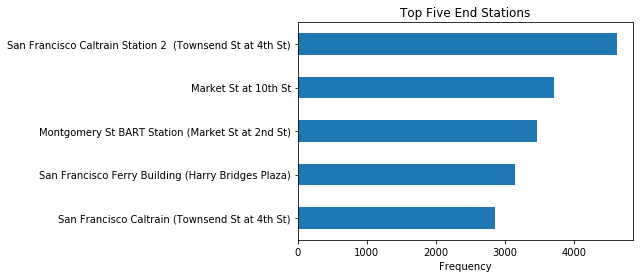

In [47]:
plt.title('Top Five End Stations')
plt.xlabel('Frequency')
df['end_station_name'].value_counts(ascending=True).tail(5).plot.barh(color = '#1f77b4');

We can see that the top five end stations among users, respectively, are:
- San Francisco Caltrain Station 2  (Townsend St at 4th St)
- Market St at 10th St
- Montgomery St BART Station (Market St at 2nd St)
- San Francisco Ferry Building (Harry Bridges Plaza) 
- San Francisco Caltrain (Townsend St at 4th St)

We can observe that some stations are popular as start and end stations.

### What is the most frequent start day of the week that users ride their bikes on?

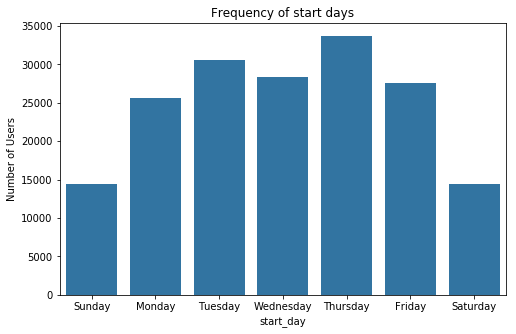

In [48]:
# Use function defined earlier

create_bar_plot(df, x = 'start_day', 
                order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                color = '#1f77b4')
plt.ylabel('Number of Users')
plt.title("Frequency of start days")

plt.show()

From the plot above, we can see that Thursday is the most frequent start day of the week, followed by Tuesday then Wednesday. We can also see that the bike rides drop on the weekends (Saturday and Sunday) which could mean that people highly use bikes for work instead of pleasure.

### What is the most frequent end day of the week that users ride their bikes on?

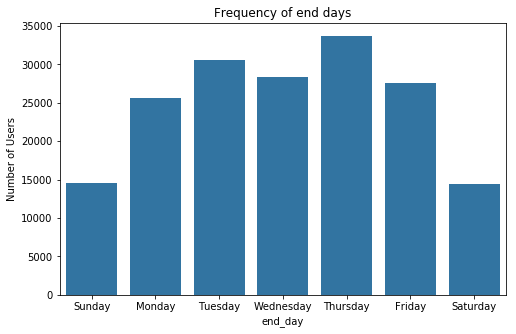

In [49]:
# Use function defined earlier

create_bar_plot(df, x = 'end_day', 
                order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                color = '#1f77b4')
plt.ylabel('Number of Users')
plt.title("Frequency of end days")

plt.show()

We can see that there are not much difference in the frequency of the start and end days. This concludes that people rent their bikes daily instead of a multiple days basis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the first visualization regarding the duration of trips, the duration takes a large amount of values and is concentrated to a tail so we transformed it to a logarthmic scale and found that peak occurs at around 600 seconds starting from 0 and then distribution starts to drop and does not regain any more peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The birth year is converted by substracting the birth year of the users from 2019, the year of the published dataset. This gives us a distibution for age, this action is performed as age gives a  better perception regarding trip duration dependency. Also, we modified the `start_time` and `end_time` to separate the date from the time and extracting the day of the week from the date column.

## Bivariate Exploration

> This section investigate relationships between pairs of variables. It also includes visual representations, such as clustered bar, bar plot, box plots, and scatter plot, to help understand the relation and spread of the data.


### What is the average trip duration based on user type?

In [50]:
# Add user types into variables

customers = df['user_type'] == 'Customer'
subscribers = df['user_type'] == 'Subscriber'

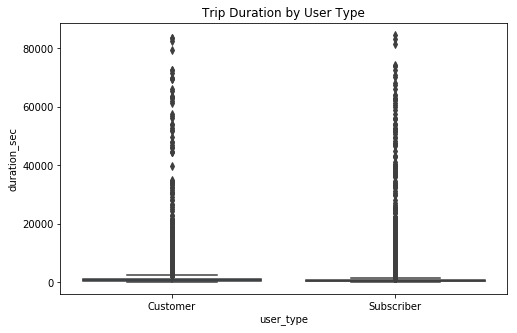

In [51]:
plt.figure(figsize = [8, 5])
plt.title('Trip Duration by User Type')
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec')

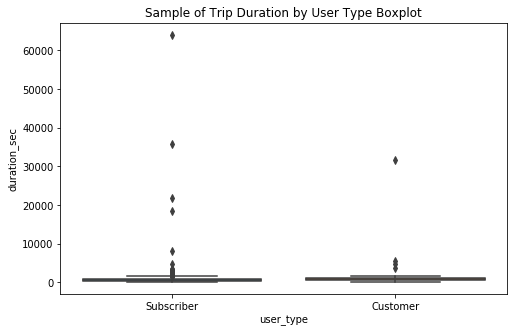

In [52]:
# Use a sample of data to make better visualization of the box plot

sample = df.sample(1000)

plt.figure(figsize = [8, 5])
plt.title('Sample of Trip Duration by User Type Boxplot')
sb.boxplot(data = sample, x = 'user_type', y = 'duration_sec')

In [53]:
# Average trip duration for Customer

df[customers]['duration_sec'].mean()

1310.7782138759737

In [54]:
# Average trip duration for Subscriber

df[subscribers]['duration_sec'].mean()

640.55250475306184

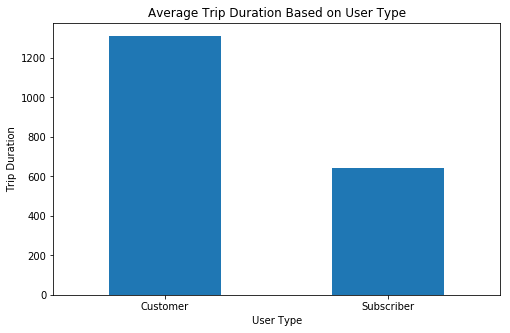

In [55]:
# Plot trip duration comparison

duration_user = df[['user_type', 'duration_sec']].groupby('user_type').mean()
duration_user.plot(kind = 'bar', figsize = [8, 5], legend= None)
plt.title("Average Trip Duration Based on User Type")
plt.ylabel("Trip Duration")
plt.xlabel('User Type')
plt.xticks(rotation=0)

plt.show()

Based on the plots above, we can see that the average trip duration of users is higher for customers in comparison with subscribers. Also, we can see that there exists some oulier values for both customers and subscribers.

### What is the relation between trip duration and users' age?

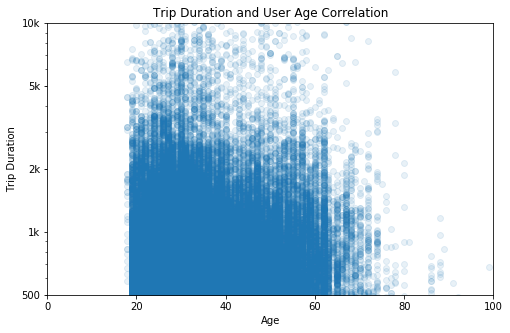

In [56]:
# scatter plot of trip duration vs. users' age, with log transform on trip duration axis

plt.figure(figsize = [8, 5])
plt.scatter(df['age'], df['duration_sec'], alpha = 1/10)
plt.xlim([0, 100])
plt.ylim([500, 10000])
plt.xlabel('Age')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.ylabel('Trip Duration')
plt.title('Trip Duration and User Age Correlation')

plt.show()

Most trip durations are below 2k and the age is below 65. We can conclude that most users who take longer trip durations are younger.

### What is the average trip duration based on users' gender?

In [57]:
# Add user genders into variables

male = df['member_gender'] == 'Male'
female = df['member_gender'] == 'Female'
others = df['member_gender'] == 'Other'

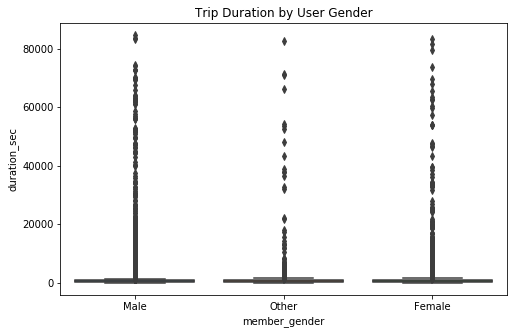

In [58]:
plt.figure(figsize = [8, 5])
plt.title('Trip Duration by User Gender')
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec');

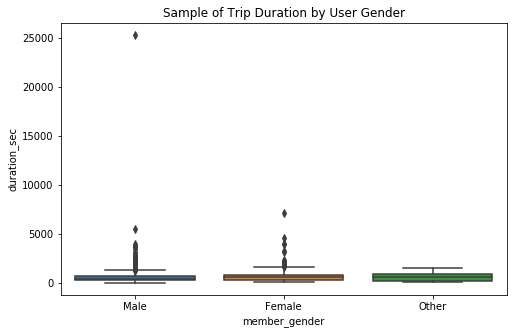

In [59]:
# Use a sample of data to make better visualization of the box plot

sample = df.sample(1000)

plt.figure(figsize = [8, 5])
plt.title('Sample of Trip Duration by User Gender')
sb.boxplot(data = sample, x = 'member_gender', y = 'duration_sec');

In [60]:
# Average trip duration for Male

df[male]['duration_sec'].mean()

672.39138934247137

In [61]:
# Average trip duration for Female

df[female]['duration_sec'].mean()

778.95001348336643

In [62]:
# Average trip duration for Other

df[others]['duration_sec'].mean()

997.40263302249036

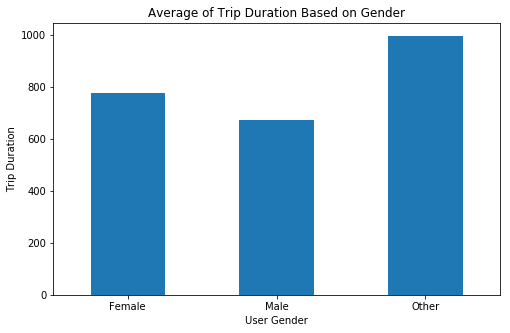

In [63]:
# Plot trip duration comparison

duration_gender = df[['member_gender', 'duration_sec']].groupby('member_gender').mean()
duration_gender.plot(kind = 'bar', figsize = [8, 5], legend= None)
plt.title("Average of Trip Duration Based on Gender")
plt.ylabel("Trip Duration")
plt.xlabel('User Gender')
plt.xticks(rotation=0)

plt.show()

From the plots above, we can see that the trip duration of female users is more than male users with an average of 779 seconds, wheras male users have an average of 672 seconds of trip durations. However, `Other` tops male and female with the trip duration frequency having an average of 997 seconds.

### What is the number of bike trips made by each user type per day?

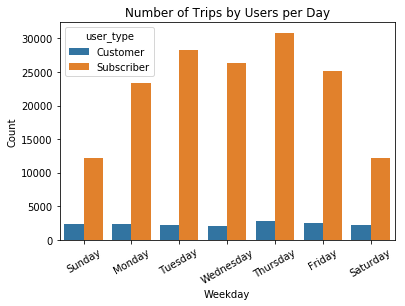

In [64]:
# Plot clustered bar chart for comparison

plot = sb.countplot(data = df, x = 'start_day', hue = 'user_type', 
             order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plot.set_title('Number of Trips by Users per Day')
plot.set_xlabel('Weekday')
plot.set_ylabel('Count')
plt.xticks(rotation=30)

plt.show()

From the clustered bar above, we can see the number of trips taken by subscribers is dramatically more than the trips taken by customers. For subscribers, we can see that Thursday has the highest number of trips, followed by Tuesday then Wednesday. As for customers, we can see that the number of trips in all weekdays are very similar. However, we can see Thursday having a slight count rise than the rest of the days, followed by Friday.

### What is the number of bike trips made by each user age per day?

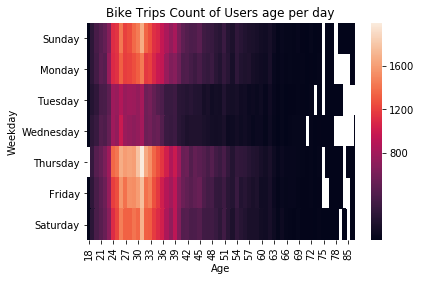

In [65]:
ct_counts = df.groupby(['start_day', 'age']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'start_day', columns = 'age', values = 'count')

# Create heatmap
heatmap = sb.heatmap(ct_counts, 
                     yticklabels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

heatmap.set_xlim([0, 65])

# set the colorbar ticks
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([800, 1200, 1600])

plt.xlabel('Age')
plt.ylabel('Weekday')
plt.title('Bike Trips Count of Users age per day')

plt.show()

From the heatmap, we can see that the majority of users aged between 24 and 36 frequently ride their bikes on Thursday, Friday, and Saturday. Also, the least frequent days for their bike rides are Tuesday and Wednesday. We can also see that users aged older than 42 don't drive their bikes much since the number of bike ride count is dropping.

### What is the correlation between each feature in the data?

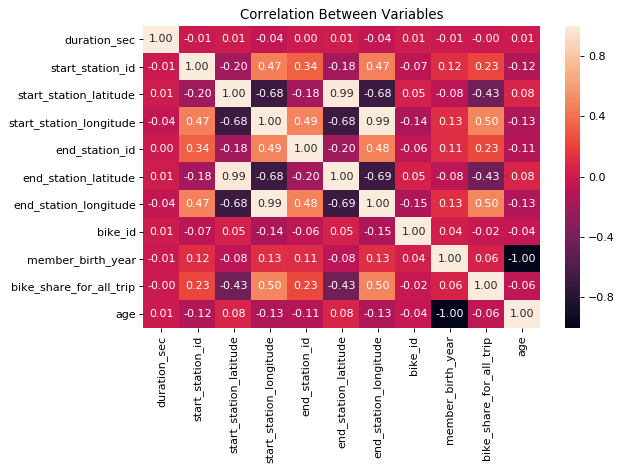

In [66]:
fig, ax = plt.subplots(figsize = [8, 5], dpi = 80)
correlation = df.corr()
sb.heatmap(correlation, annot = True, fmt = '.2f')
ax.set_title("Correlation Between Variables")
plt.xticks(rotation=90)

plt.show()

From the heatmap above, we can observe the following:
- There are almost no correlation between the trip duration and the start and end station ids, in addition to their longtitude and latitude.
- There is a weak correlation between the start station id and the start and end station longtitudes. Thus, we can say that the station location might be a good factor to further study in the future.
- There is a strong correlation between the start station latitude and the end station latitude. The same goes for the longtitude.
- There is a negative correlation between the birth year and the age.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We observed that the trip duration depends on two important factors which are: **user type** and **user age**. The main reason is that the trip duration is significantly higher for customers in comparison with subscribers. Also, the age of users affects the duration of trips since users between 20 and 40 are the majority of bikers. We also observed that the subscribers have a higher bike ride count regardless of customers taking longer trip durations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The gender of users and its dependance on the trip duration is very interesting. We observed that females have a higher trip duration than males. We also observed that Thursday is the most popular day for bike rides among subscriberes and customers. In addition, we observed that the location of the start station and end station have a strong correlation, meaning that they are important factors in the dataset. Also, having no correlation between trip duration and the location of the stations is surprising. 

## Multivariate Exploration

> This section investigates the relation between three or more variables in the data. This section would help us in investigating the data further, in addition to concluding insights from previous sections.

### What is the trip duration across gender and user type? 

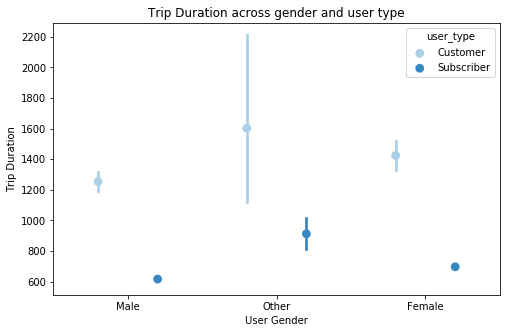

In [67]:
fig = plt.figure(figsize = [8,5])
ax = sb.pointplot(data = df, x = 'member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.title('Trip Duration across gender and user type')
plt.ylabel('Trip Duration')
plt.xlabel('User Gender')

plt.show()

From the point plot above, we can say that **Other** gender and **Customer** user type spent the longest trip duration. For the male and female, we can see that **female customers** had longer trip durations than **male customers**. Overall, customers have longer trip durations than subscribers on a significant level.

### What is the bike trip duration of user types per day?

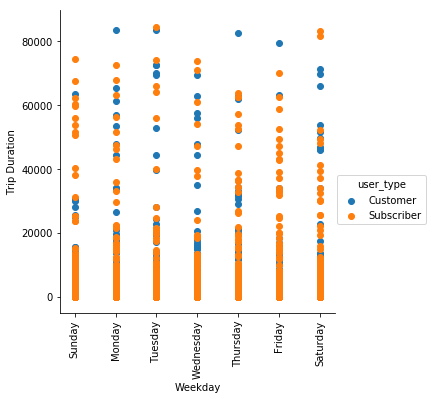

In [68]:
g = sb.FacetGrid(data = df, hue = 'user_type', size = 5)
g.map(plt.scatter, 'start_day', 'duration_sec')
g.add_legend()

# Set the order of the x-axis
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
g.set_xticklabels(day_order, rotation=90)
g.set_xlabels('Weekday')
g.set_ylabels('Trip Duration')
g.set_titles('Trip Duration for User Types per Day')

plt.show()

From the plot above, we can see that the majority of both customers and subscribers trip durations are clustered below 20,000 seconds i.e. 333.33 minutes (5.56 hours). Surprisingly, we can see that we have outliers for both customers and subscribers where the trip duration can reach up to 80,000 seconds (1333.3333 hours), for all weekdays. In addition, we can see that customers have longer trip durations on Monday, Wednesday, and Saturday. Whereas, subscribers have longer trip durations on Sunday, Thursday and Friday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We observed that the `other` gender are the majority of customers and the ones who take the longest trip durations. We also observed that the majority of subscribers and customers take around 5.56 hours of trip durations or less on all weekdays. 

### Were there any interesting or surprising interactions between features?

> Customers who have `other` gender take the longest trip durations. Surprisingly, there exists some outliers for customers and subscribers where the trip duration can be as long as 80,000 seconds or more (1333.3333 hours).

## Conclusions
> After exploring many factors, we conclude the following:
- The average of trip durations is around 600 seconds i.e. 10 minutes.
- Even though the majority of users are subscribers, customers have longer trip durations that subscribers.
- Most users are aged between 20 and 40 with the average being 33 years old.
- While male users are the majority of users in the system, female users and others have longer trip durations than male users.
- Most users aged between 20 and 40 have trip duartions below 2000 seconds i.e. 33 minutes.
- The highest day of the week for bike rides is Thursday, and the lowest is the weekend (Saturday and Sunday).
- There is a strong relation between the location of the start and end stations.
- There is no clear relation between the trip duration and the location of stations.
- The majority of subscribers and customers take around 5.56 hours of trip durations or less on all weekdays. 
- The most popular day for bike rides for subscribers is Thursday and customers have longer trip durations on Saturday.

In [69]:
# Export clean dataset to csv format

df.to_csv('df_clean.csv', index=None)